In [3]:

import numpy as np
attributes = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]
data = np.array([

    ["<=30", "high", "no", "fair", "no"],

    ["<=30", "high", "no", "excellent", "no"],

    ["31-40", "high", "no", "fair", "yes"],

    [">40", "medium", "no", "fair", "yes"],

    [">40", "low", "yes", "fair", "yes"],

    [">40", "low", "yes", "excellent", "no"],

    ["31-40", "low", "yes", "excellent", "yes"],

    ["<=30", "medium", "no", "fair", "no"],

    ["<=30", "low", "yes", "fair", "yes"],

    [">40", "medium", "yes", "fair", "yes"],

    ["<=30", "medium", "yes", "excellent", "yes"],

    ["31-40", "medium", "no", "excellent", "yes"],

    ["31-40", "high", "yes", "fair", "yes"],

    [">40", "medium", "no", "excellent", "no"]

])

def calculate_entropy(data, column):

    unique_values, counts = np.unique(data[:, column], return_counts=True)

    probabilities = counts / len(data)

    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

entropy_values = {}

for column in range(data.shape[1] - 1):

    entropy_values[attributes[column]] = calculate_entropy(data, column)

selected_attribute = max(entropy_values.items(), key=lambda item: item[1])[0]
print("Entropy of each attribute / feature:")

for attribute, entropy_value in entropy_values.items():

    print(f"{attribute}: {entropy_value:.3f}")
print("First feature to be selected for constructing the decision tree:")

print(f"{selected_attribute}: {entropy_values[selected_attribute]:.3f}")

Entropy of each attribute / feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.577


In [5]:
import numpy as np
import pandas as pd
import random
data = [
  ["<=30", "high", "no", "fair", "no"],
  ["<=30", "high", "no", "excellent", "no"],
  ["31-40", "high", "no", "fair", "yes"],
  [">40", "medium", "no", "fair", "yes"],
  [">40", "low", "yes", "fair", "yes"],
  [">40", "low", "yes", "excellent", "no"],
  ["31-40", "low", "yes", "excellent", "yes"],
  ["<=30", "medium", "no", "fair", "no"],
  ["<=30", "low", "yes", "fair", "yes"],
  [">40", "medium", "yes", "fair", "yes"],
  ["<=30", "medium", "yes", "excellent", "yes"],
  ["31-40", "medium", "no", "excellent", "yes"],
  ["31-40", "high", "yes", "fair", "yes"],
  [">40", "medium", "no", "excellent", "no"]
]

# Create a list of unique values for each categorical feature
age_values = ["young", "middle-aged", "senior"]
income_values = ["high", "medium", "low"]
student_values = ["no", "yes"]
credit_rating_values = ["fair", "excellent"]

# Create a function to generate random categorical values
def generate_random_categorical_value(values):
  return random.choice(values)

# Generate random categorical values for each categorical feature
random_age = generate_random_categorical_value(age_values)
random_income = generate_random_categorical_value(income_values)
random_student = generate_random_categorical_value(student_values)
random_credit_rating = generate_random_categorical_value(credit_rating_values)

# Create a random data point
data_point = [random_age, random_income, random_student, random_credit_rating, "unknown"] # Add a label for the new data point

# Append the random data point to the existing data
data.append(data_point)

# Convert the data list to a NumPy array
data = np.array(data)

# Define column names
columns = ["age", "income", "student", "credit_rating", "buys_computer"]

# Define the categorical features
categorical_features = ["age", "income", "student", "credit_rating"]

# Create a new DataFrame from the updated data
df = pd.DataFrame(data, columns=columns)

# Split the data into features and target
X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

# Create a preprocessor to one-hot encode the categorical features
preprocessor = ColumnTransformer(
  transformers=[("cat", OneHotEncoder(), categorical_features)],
  remainder="passthrough",
)

# Create a pipeline to combine the preprocessor and classifier
pipeline = Pipeline([
  ("preprocessor", preprocessor),
  ("classifier", DecisionTreeClassifier()),
])

# Fit the pipeline to the data
pipeline.fit(X, y)
tree_depth = pipeline.named_steps["classifier"].get_depth()

# Print the tree depth
print(f"Tree depth: {tree_depth}")

Tree depth: 5


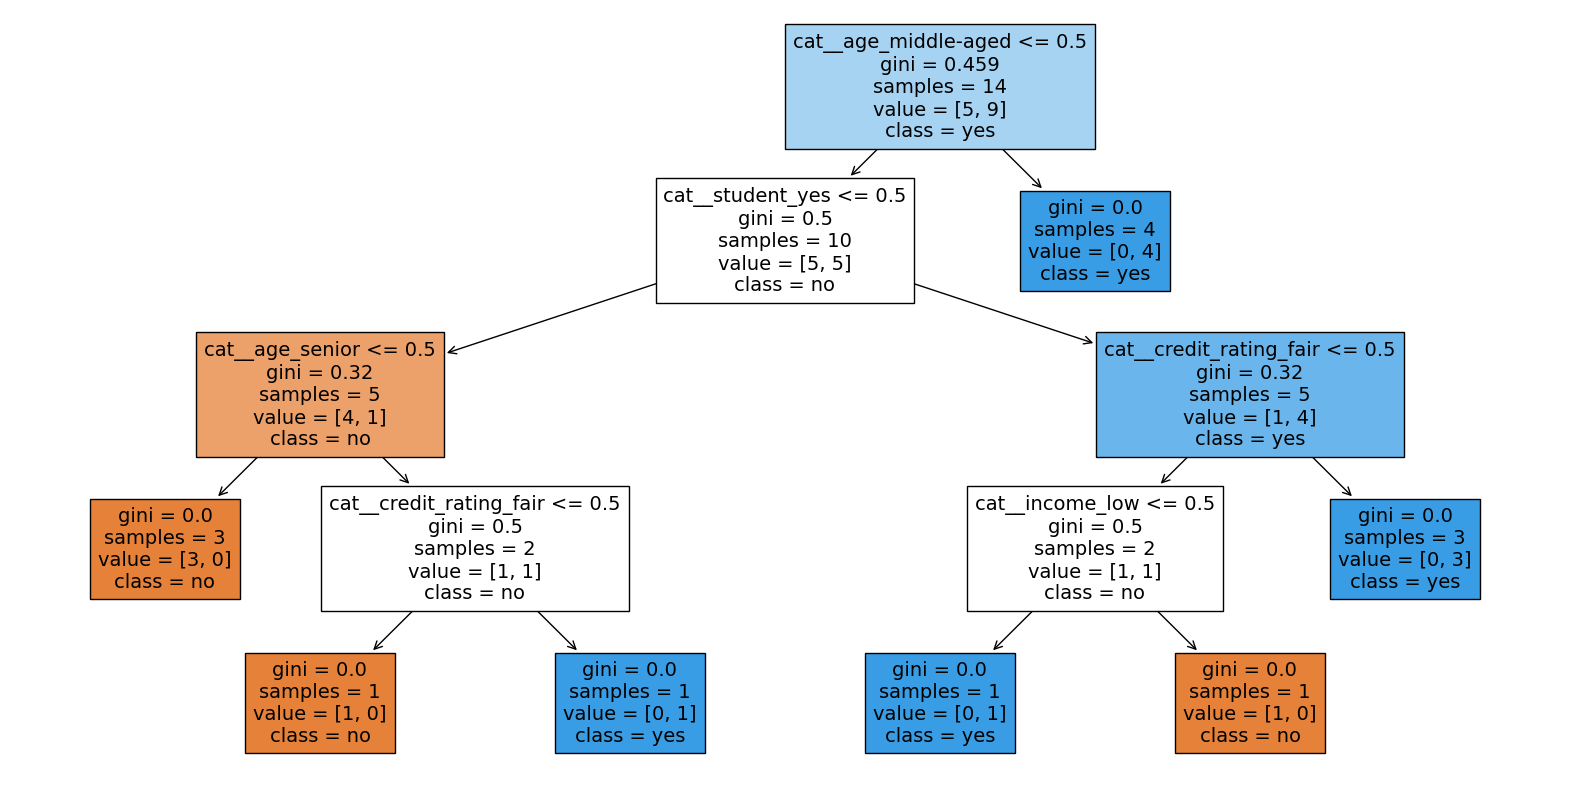

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Sample data
custom_data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

# Define column names
custom_columns = ["age", "income", "student", "credit_rating", "buys_computer"]

# Create a DataFrame from the custom data
custom_df = pd.DataFrame(custom_data, columns=custom_columns)

# Split the data into features and target
X_custom = custom_df.drop("buys_computer", axis=1)
y_custom = custom_df["buys_computer"]

# Categorical features for one-hot encoding
custom_categorical_features = ["age", "income", "student", "credit_rating"]

# Create a ColumnTransformer for preprocessing
custom_preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), custom_categorical_features)],
    remainder="passthrough"
)

# Create a Pipeline
custom_pipeline = Pipeline([
    ("preprocessor", custom_preprocessor),
    ("classifier", DecisionTreeClassifier())
])

# Fit the Pipeline to the custom data
custom_pipeline.fit(X_custom, y_custom)

# Get feature names after one-hot encoding
custom_feature_names = list(custom_pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=custom_categorical_features)) + list(X_custom.columns.drop(custom_categorical_features))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(custom_pipeline.named_steps["classifier"], filled=True, feature_names=custom_feature_names, class_names=['no', 'yes'])
plt.show()